<a id="top"> </a>

To view this on a full page, please right-click and 'open in new tab' [this link](#"top").<br/>
Apologies that the internal hyperlinks don't work in github, this will be investigated in the future.

# COVID-19 Visualizations
---

<a id="division_ID"> </a>

This notebook contains plots detailing the global data and trends on the global COVID-19 outbreak. <br/>
The data used is collected by the ECDC and provided by ourworldindata.org (https://ourworldindata.org/coronavirus).

The data is collected and processed in the Data-Download and the Data-Processig sheet respectivelly. Both of which can be found in the COVID-data directory and have step by step explinations in case of interest. <br/>
These sheets will be run every day with the daily new information and all requests for extra information, graphs or genral input are always more then welcome.

Though before we start we'll need to import the script containing all the functions and datasets. This script is located in this directory for those who are interested and everything is placed in there as to keep this notebook clean and readable. 

In [1]:
import my_tools as mt

## Index
---
- [Countries of interest](#interest_info)

- [Most active countries](#worst_info)

- [Global information](#global_info)


I will do the full explination of the graphs and how to read them on the first group, the rest can be interpretted the same way.

<a id="interest_info"> </a>
## Countries of interest
---
This is a selection of countries made through personal relations with people at those locations or intuitive interest in their progress. <br/>
To start we'll create the list of countries and order them alphabetically for ease of reading.

In [2]:
countries_of_interest = ['China', 'France', 'Italy', 'United_States_of_America', 'Spain', 
                         'United_Kingdom', 'Belgium', 'Russia', 'Ukraine', 'South_Korea']

countries_of_interest.sort()

### New cases and deaths 

As a first visualization we will plot both the new cases as well as the new deaths, per country, per day.

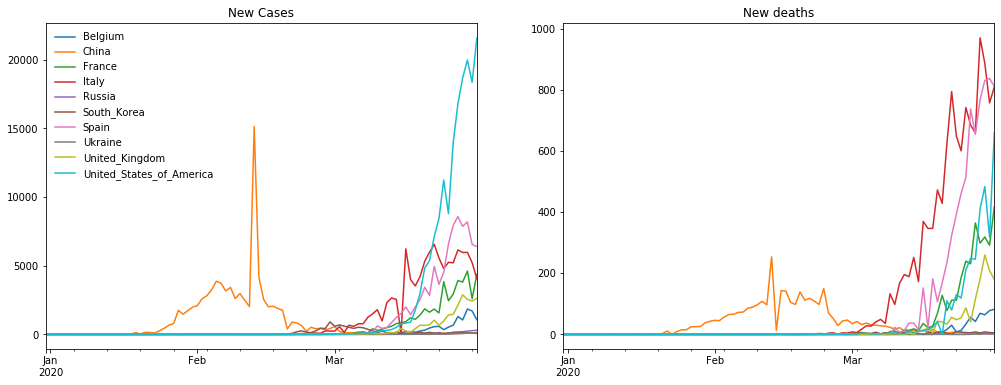

In [3]:
mt.plot_both('new', countries_of_interest)

Since these are quite intuative plots on the progressing of the infection, we will not go deep into these.

Though considering the daily data is so noisy, with high variation, it will be a bit easier to read the graph if we take weekly steps. Meaning instead of plotting the daily data, we plot the amount of new cases per week. 

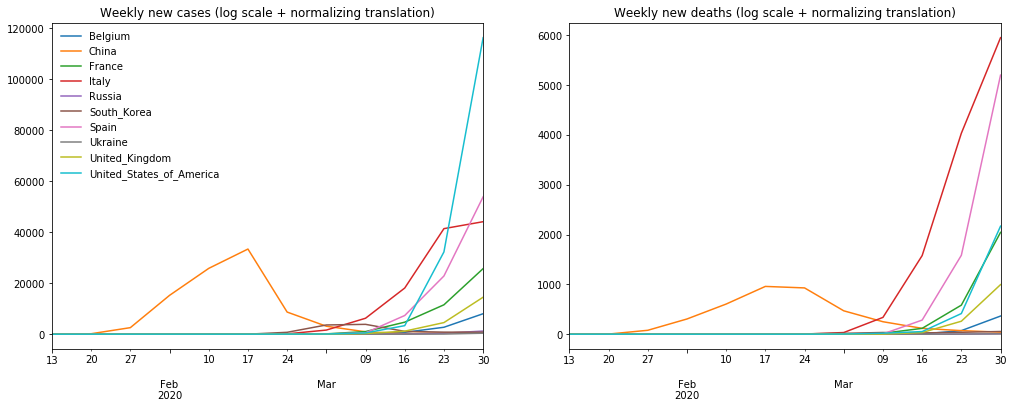

In [4]:
mt.plot_both('weekly', countries_of_interest)

### Total cases, deaths

The following are plots containing data on the total amount of cases per country, per day.

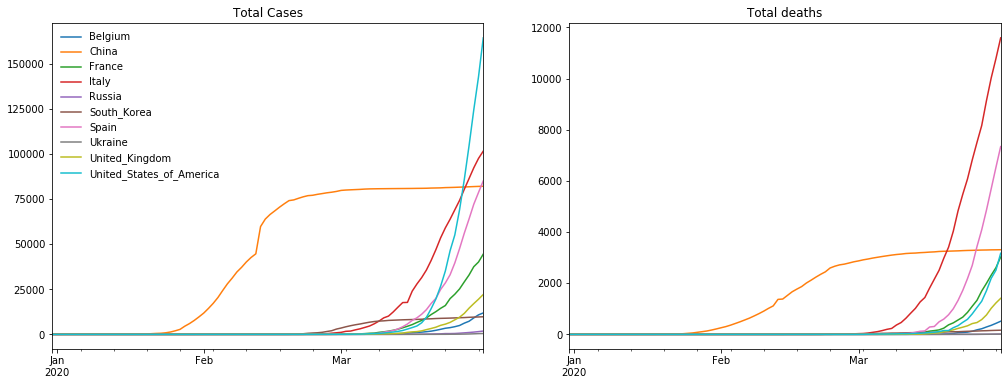

In [5]:
mt.plot_both('total', countries_of_interest)

These are the first graphs that need some extra consideration. 

We can intuitively guess that the spread of an infection will first go exponentially upward, infecting more people the more people are infected, followed by an exponential drop, in the same thought process. This can be seen in the case of China and South-Korea. The fact that these countries (as of now) have stopped the spread of infection, is the reason they were included in this set.

Do remember that through inperfect testing and the fact that due to the nature of crisis, the data will be inperfect. In reality these curves would be less steap with a more gradual slope.

The difficulty is to visualize and comprehend this kind of exponential growth. Since it is hard to compare the progression of all the countries' infection like this.
For this reason we will plot the game data again, but this time we put the y-axes in a logarithmic scale. Since this is the natural scale of an exponential function. and to make it easier to compare the countries, we will move them allong th x-axes so they all start from the moment they have 100 cases or 10 deaths.

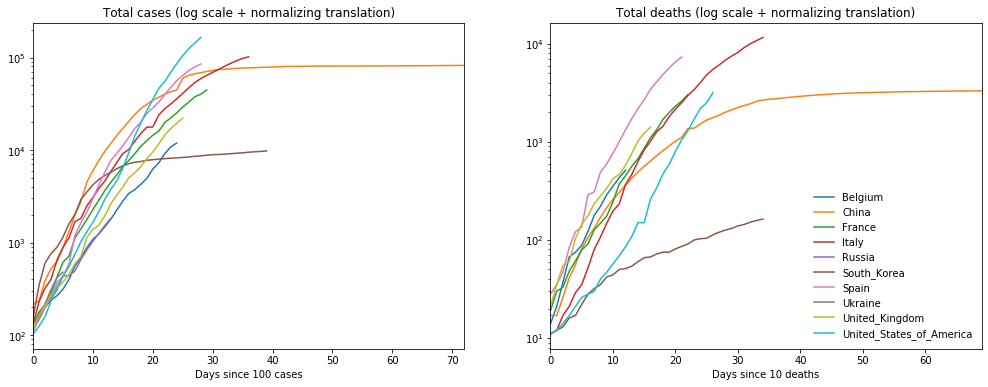

In [6]:
mt.plot_both('total_log', countries_of_interest)

For the total cases we now have a graph that can be use to get our first intuitive estimate of how countries compare in dealing with the outbreak. As we can see the general trend that every country undergoes. 

A first note is that since the startdate of the infection is centered for each country, this doesn't compare the real-time situation but more how the infection progressed through each of the countries.
To interpret the graph we can look at the relative position of the countries at any point in time. The higher a countries lies above others means that, at that relative time since the first infection, the spread of infection was more drastic than in the other countries, and vica virsa if they find themselfs below the others.
The second interesting thing to look at is the how the slope plateaus for China and South_korea. These were the countries that have stopped the spread, which is exactly what that plateau repressents. We can use this to see if other countries start to plateau like that which would also indicate they're overcoming the spread of infection.

The graph showing the total deaths can be interpreted in the same way. Though considering there is more variability between countries in here, through healthcare systems, preparedness, ext., there is more variability on the slope.

Important to remember when it comes to reading logarithmic scale, the distance between 10 and 100 is the same as the distance between 100.000 and 1.0000.000. It is for this reason that we chose to start fro 10 and 100 deaths and cases respectively, as well as why for the total deaths, the bottom of the graphs ore more distorted.

### New cases compared to total

The final graph we would like to share is a visualization provided by [Minute Physics](#https://www.youtube.com/watch?v=54XLXg4fYsc) on youtube which is very compelling.
It takes the weekly increase in cases on the y-axes and the total amount of cases on the x-axes. 
Considering both these quantities grow at an exponential rate, we can place both axis in logarithmic scale.

Note that since there is no time axes, this is expressed through the movement of a country through the graph, there is no need to translate to normalize. But for the same reason as in the previous graphs, we will let the data start from the point there are 100 weekly cases. 

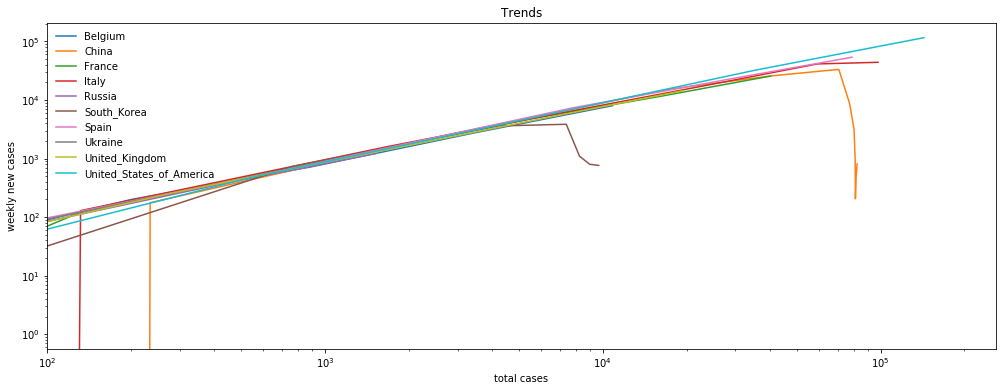

In [7]:
mt.plot_trends(countries_of_interest)

This means that for all the countries that follow the same spread of infection will follow the same straight line. This shows that the actual spread is the same in most countries. Though again through differing features of each, such as the country size, population density and site of first infection, this spread is expressed differently in the different countries.

The reason why this graph is compelling is that any country that has stopped their infection spread, or get's it under control, will simply fall off the main line, like China and South-Korea have done. Where China had a hard stop of the infection, South-Korea had a periode of relative stabile infection rates before it dropped.
Though this plot is very handy to see the global trends from the first infection on, this is all it can do. It cannot be used for any comparissons, since it only looks at the the spread compared to total cases. This also means that in the case China has stopped the first infection growth, but where the infection has recently started again, it will not follow the main line anymore. China will start its new trend if this continues which means that, at a later time, we can compare the main trend of infection for the initial infection to that of resurgence of the infection.

In conclussion, this graph can be used to see how countries experience the initial spread of infection. If they fall under the line, they're containing the virus well. If they're above the line, this means that the infection is spreading stronger than in other countries.

### Table with data

To end with, we will provide a table containing the exact numbers for each country. 

- relative cases = total amount of cases / country popultion
- relative deaths = total amount deaths / total amount of cases

In [8]:
mt.show_table(countries_of_interest)

<a id="worst_info"> </a>
[Back to top](#top)

## Most active countries

This section contains the information on the countries that are the most active in the last week.

This list is created by looking at the 10 countries that have the most amount of new cases and the 10 taht have the most amount of new deaths, both in the last week, and getting the intersection of these two lists. Most of the time these list have the same countries in them, in which case the intersection keeps 10.

For this section we will plot the data on the last 40 days, this will be updated later to an automatic system.

As mentioned in the section above. 
There will be no extra explinations on the provided graphs in this section.

In [9]:
active_countries = mt.find_active()
amount_days = 40

print(active_countries)

['Belgium', 'France', 'Germany', 'Iran', 'Italy', 'Spain', 'Switzerland', 'United_Kingdom', 'United_States_of_America']


### New cases and deaths 

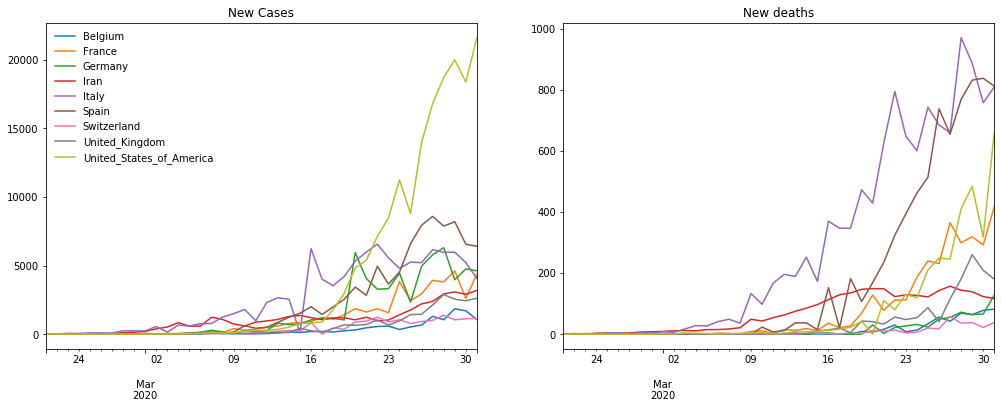

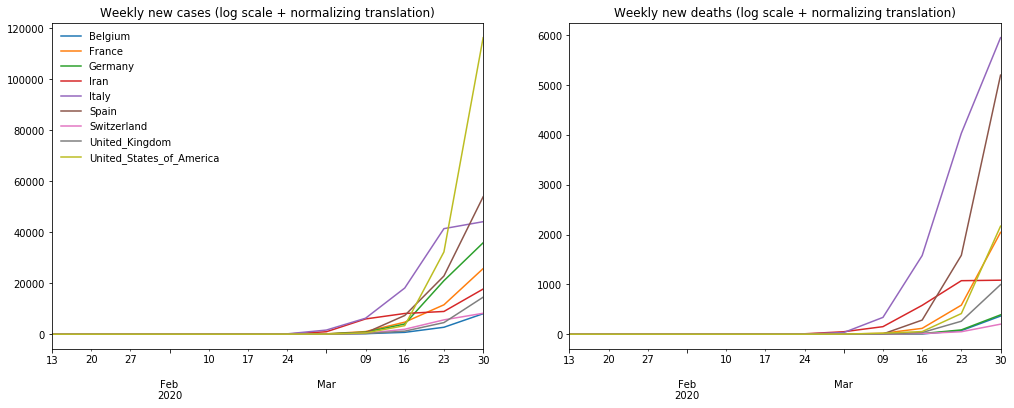

In [10]:
mt.plot_both('new', active_countries, days=amount_days)
mt.plot_both('weekly', active_countries, days=amount_days)

### Total cases, deaths

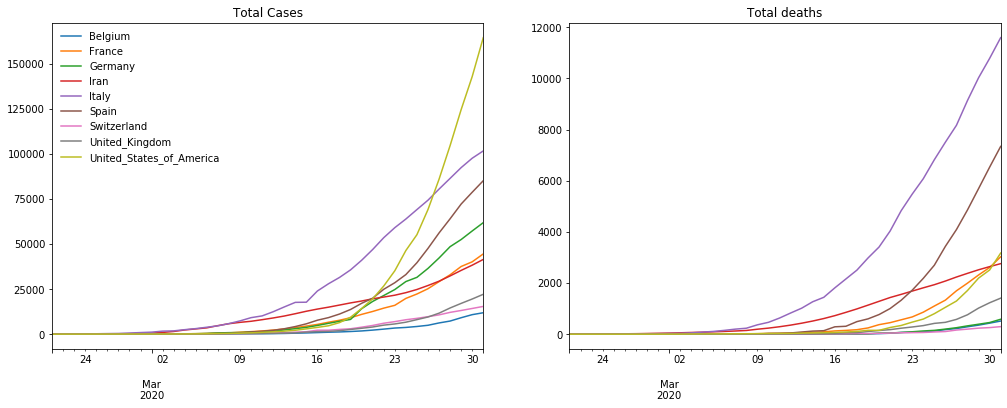

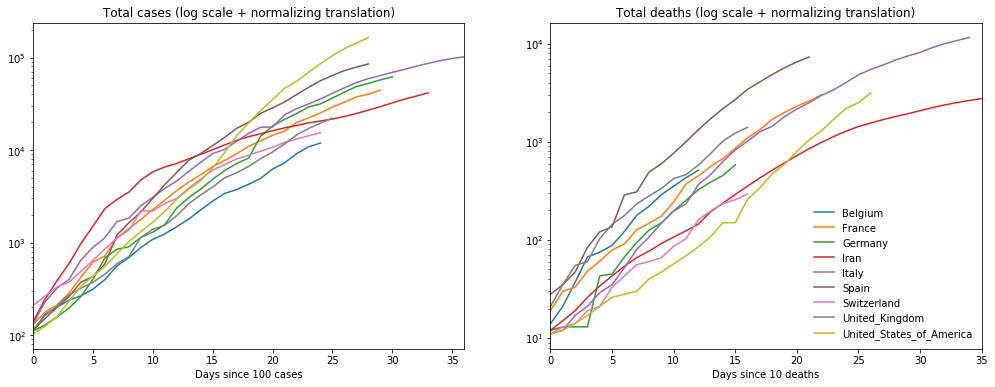

In [11]:
mt.plot_both('total', active_countries, days=amount_days)
mt.plot_both('total_log', active_countries)

### New cases compared to total

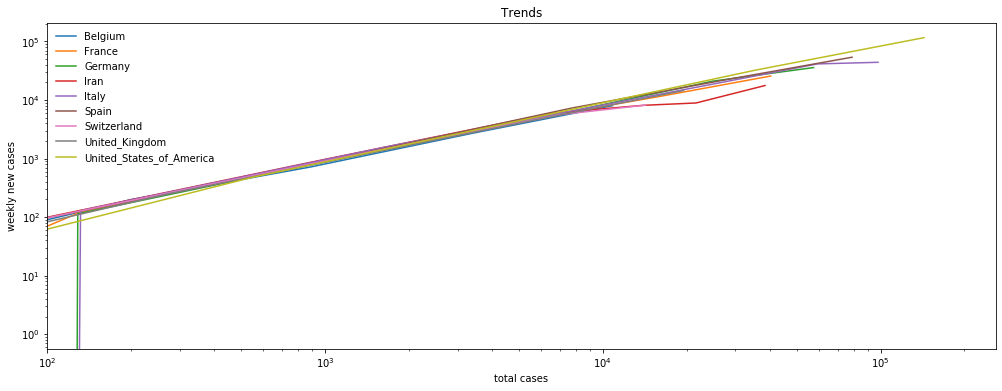

In [12]:
mt.plot_trends(active_countries)

### Table with data

In [13]:
mt.show_table(active_countries)

<a id="global_info"> </a>
[Back to top](#top)

# Global info

This last section contains data on every country of which data is provided. 
Though the graphs look quite messy in these, it can give a bit of an overview how the disease is spreading everywhere.

The graphs for this set are quite hectic and for the moment there is no legend. Considering the amount of countries is so large,this needs some other implimentations. Appologies for this, this will be present in a future update.

### Global averages


To start of with we will plot the global amount for cases and deaths.
- cases_ relative = total cases / world population
- deaths_relative = total deaths / total cases

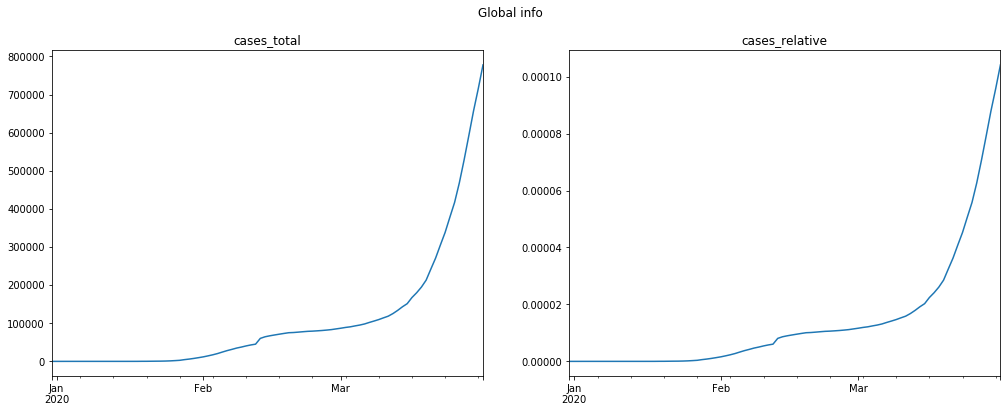

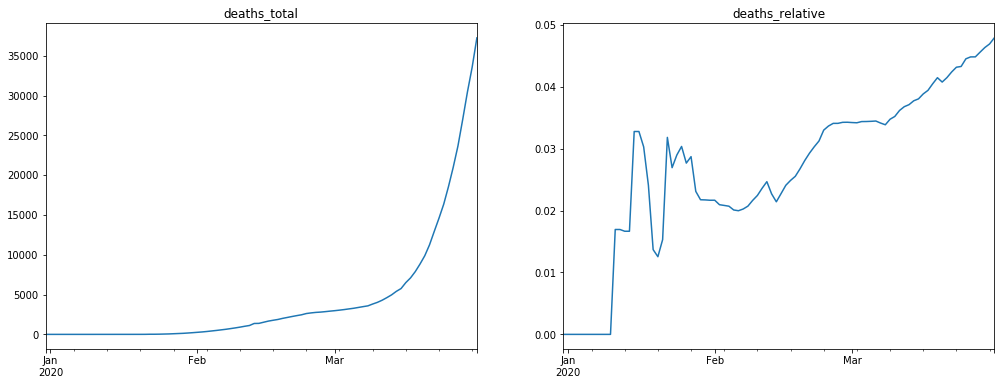

In [14]:
mt.plot_global()

As mentioned in the section above. 
There will be no extra explinations on the provided graphs in this section.

Though seeing the death rate ever increasing is an unpleasant sight.

### New cases and deaths 

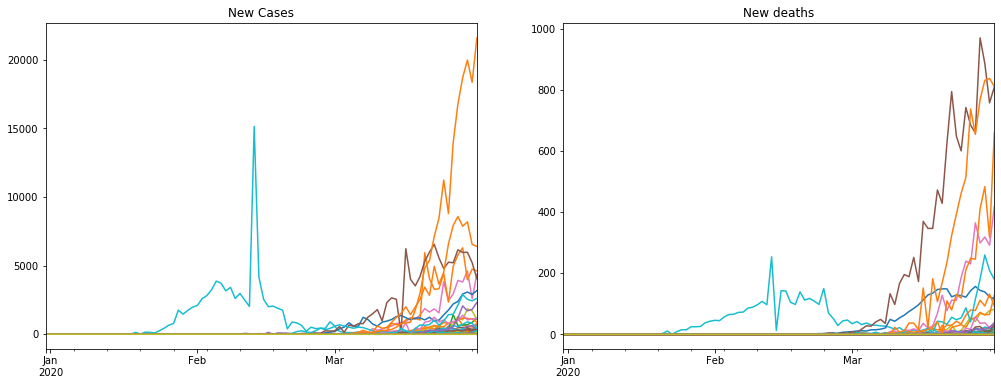

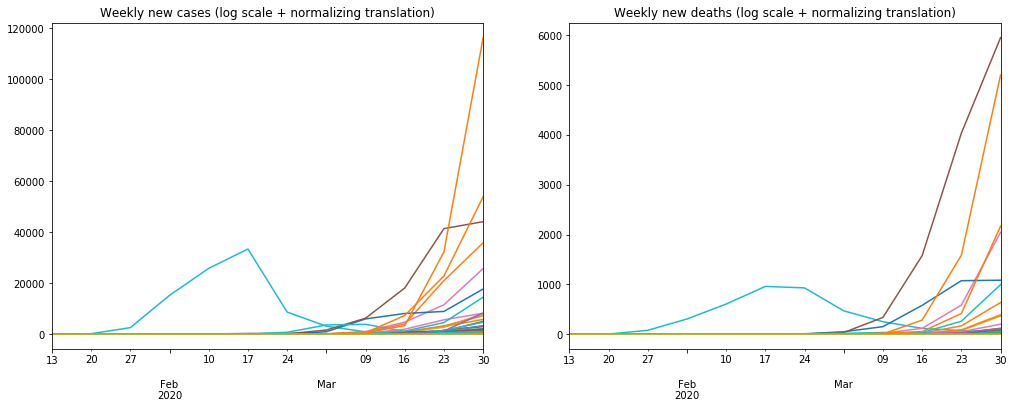

In [15]:
mt.plot_both('new')
mt.plot_both('weekly')

### Total cases, deaths

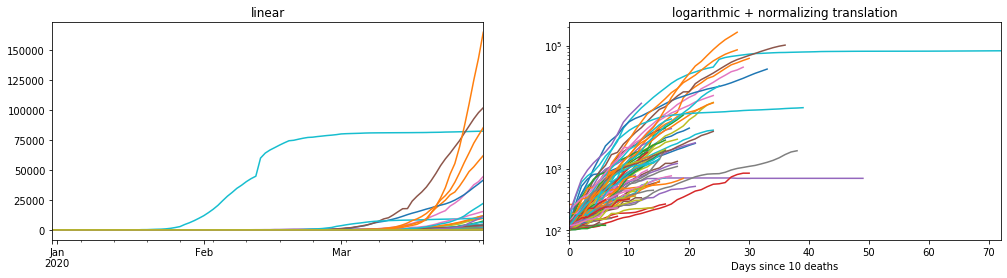

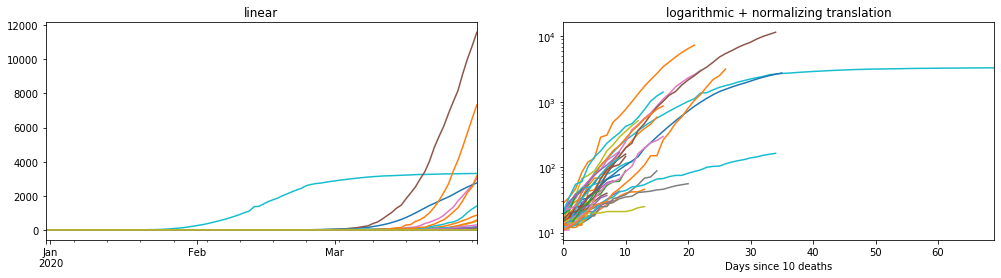

In [16]:
mt.plot_total('cases')
mt.plot_total('deaths')

### New cases compared to total

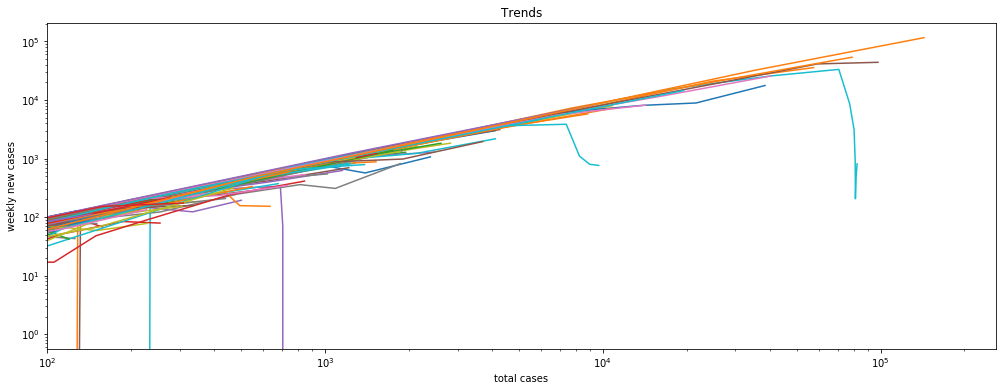

In [17]:
mt.plot_trends()

### Table with data

In [18]:
mt.show_table()

[Back to top](#top)